importing the libraries & loading the dataset

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("wine_data.csv")
print(df.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

Questions:
1.	What is the most frequently occurring wine quality?
What is the highest number in and the lowest number in the quantity column?


In [99]:
freq_quality = df['quality'].mode()[0]
print(freq_quality)

5


In [100]:
print("Highest Quality of Wine : ",df['quality'].max())
print("Lowest Quality of Wine : ",df['quality'].min())

Highest Quality of Wine :  8
Lowest Quality of Wine :  3


Questions:
2.	How is `fixed acidity` correlated to the quality of the wine? How does the alcohol content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?


In [101]:
acidity_corr = df['fixed acidity'].corr(df['quality'])
alcohol_corr = df['alcohol'].corr(df['quality'])
sulfur_corr = df['free sulfur dioxide'].corr(df['quality'])

def catg(corr):
    if abs(corr) >= 0.7:
        return "High"
    elif 0.3 <= abs(corr) < 0.7:
        return "Moderate"
    elif 0 <= abs(corr) < 0.3:
        return "Low"

def printtt(corr, feature):
    category = catg(corr)
    if corr > 0:
        print(f"Correlation of {feature} with Quality: {corr:.2f}")
        print(f"As the correlation between {feature} & Quality is {corr:.2f}, they have {category} Positive Correlation.\n")
    elif corr < 0:
        print(f"Correlation of {feature} with Quality: {corr:.2f}")
        print(f"As the correlation between {feature} & Quality is {corr:.2f}, they have {category} Negative Correlation.\n")
    else:
        print(f"Correlation of {feature} with Quality: {corr:.2f}")
        print(f"There is no correlation between {feature} & Quality.\n")

printtt(acidity_corr, 'Fixed Acidity')
printtt(alcohol_corr, 'Alcohol')
printtt(sulfur_corr, 'Free Sulfur Dioxide')

Correlation of Fixed Acidity with Quality: 0.12
As the correlation between Fixed Acidity & Quality is 0.12, they have Low Positive Correlation.

Correlation of Alcohol with Quality: 0.48
As the correlation between Alcohol & Quality is 0.48, they have Moderate Positive Correlation.

Correlation of Free Sulfur Dioxide with Quality: -0.05
As the correlation between Free Sulfur Dioxide & Quality is -0.05, they have Low Negative Correlation.



Questions:
3.	What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?


In [102]:
best = df['quality'].max()
low = df['quality'].min()

bestavg = df[df['quality'] == best]['residual sugar'].mean()
lowavg = df[df['quality'] == low]['residual sugar'].mean()

print(f"Avg Residual Sugar for Best Quality Wine (Quality {best}): {bestavg:.2f} g/L")
print(f"Avg Residual Sugar for Lowest Quality Wine (Quality {low}): {lowavg:.2f} g/L")

Avg Residual Sugar for Best Quality Wine (Quality 8): 2.58 g/L
Avg Residual Sugar for Lowest Quality Wine (Quality 3): 2.64 g/L


Questions:
4.	Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?


In [103]:
def catg(corr):
    if abs(corr) >= 0.7:
        return "High"
    elif 0.3 <= abs(corr) < 0.7:
        return "Moderate"
    elif 0.1 <= abs(corr) < 0.3:
        return "Low"
    else:
        return "Very Low"

def printtt(corr, feature):
    category = catg(corr)
    if corr > 0:
        print(f"Correlation of {feature} with Quality: {corr:.2f}")
        print(f"As the correlation between {feature} & Quality is {corr:.2f}, they have {category} Positive Correlation.\n")
    elif corr < 0:
        print(f"Correlation of {feature} with Quality: {corr:.2f}")
        print(f"As the correlation between {feature} & Quality is {corr:.2f}, they have {category} Negative Correlation.\n")
    else:
        print(f"Correlation of {feature} with Quality: {corr:.2f}")
        print(f"There is no correlation between {feature} & Quality.\n")

acidity_corr = df['volatile acidity'].corr(df['quality'])
printtt(acidity_corr, 'volatile Acidity')

Correlation of volatile Acidity with Quality: -0.39
As the correlation between volatile Acidity & Quality is -0.39, they have Moderate Negative Correlation.



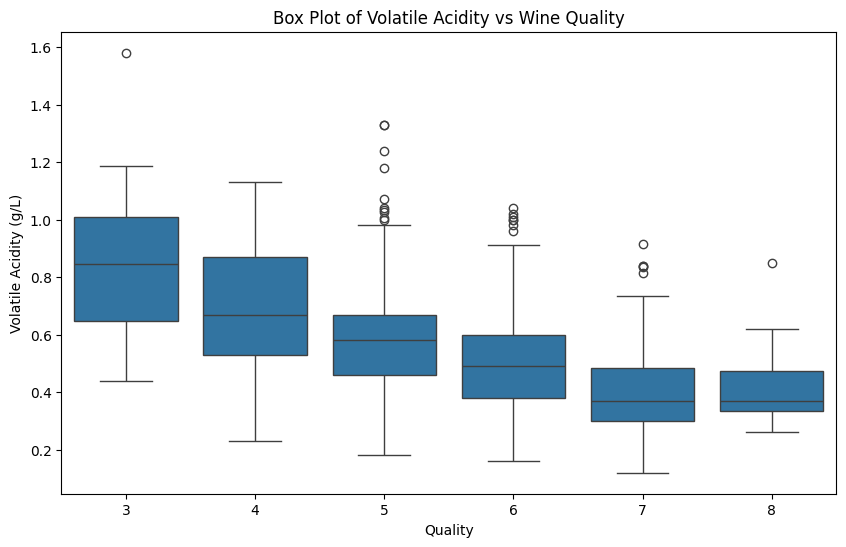

Correlation of volatile Acidity with Quality: -0.39
As the correlation between volatile Acidity & Quality is -0.39, they have Moderate Negative Correlation.


In [104]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Box Plot of Volatile Acidity vs Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity (g/L)')
plt.show()

print("Correlation of volatile Acidity with Quality: -0.39")
print("As the correlation between volatile Acidity & Quality is -0.39, they have Moderate Negative Correlation.")

Questions:

5.	Train a Decision Tree model and Random Forest Model separately to predict the Quality of the given samples of wine. Compare the Accuracy scores for both models.



Spliting the variables based on Independent & Dependant

In [105]:
# x -> independant variables
x = df.iloc[:,:-1]
print(x.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [106]:
#y -> dependant/target variable
y = df.iloc[:,-1]
print(y.head(10))

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64


Splitting the data for Training and Testing

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25, random_state = 0)

Importing and training Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", random_state=0)
dt.fit(x_train, y_train)

# Prediction
y_pred_dt = dt.predict(x_test)

y_pred_dt = np.array(y_pred_dt).reshape(len(y_pred_dt), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

print("y_pred y_test")
print(np.concatenate((y_pred_dt, y_test), axis=1))

y_pred y_test
[[5 6]
 [5 5]
 [7 7]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [4 4]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [4 5]
 [7 6]
 [6 6]
 [7 7]
 [4 5]
 [5 5]
 [4 4]
 [7 7]
 [6 6]
 [6 6]
 [4 4]
 [5 6]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [6 5]
 [5 6]
 [7 7]
 [7 7]
 [6 5]
 [3 6]
 [7 6]
 [6 7]
 [5 5]
 [6 7]
 [6 6]
 [7 6]
 [6 5]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [6 5]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 5]
 [5 5]
 [7 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [5 4]
 [6 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [5 5]
 [6 6]
 [7 6]
 [6 6]
 [6 5]
 [4 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 4]
 [6 5]
 [5 7]
 [6 6]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [7 8]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [3 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [8 7]
 [6 5]
 [5 6]
 [7 6]
 [6 6]
 [7 7]
 [6 6]
 [6 6]
 [5 5]
 [4 7]
 [5 5]
 [6 5]
 [7 6]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [7 6]
 [4 6]
 [5 6]
 [5 6]
 [5 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [7 8]
 [5 5]
 [6 6]

Importing and Training RandomForest

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
rf.fit(x_train, y_train)

# Prediction
y_pred_rf = rf.predict(x_test)
y_pred_rf = np.array(y_pred_rf).reshape(len(y_pred_rf), 1)

print("y_pred y_test")
print(np.concatenate((y_pred_rf, y_test), axis=1))

y_pred y_test
[[6 6]
 [5 5]
 [7 7]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 4]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [7 5]
 [5 6]
 [7 6]
 [7 7]
 [5 5]
 [5 5]
 [5 4]
 [6 7]
 [5 6]
 [6 6]
 [6 4]
 [6 6]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [6 5]
 [6 6]
 [7 7]
 [7 7]
 [5 5]
 [5 6]
 [6 6]
 [6 7]
 [5 5]
 [7 7]
 [7 6]
 [7 6]
 [6 5]
 [5 5]
 [5 6]
 [6 6]
 [5 6]
 [6 5]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [5 5]
 [5 5]
 [5 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [5 6]
 [5 6]
 [5 4]
 [5 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 4]
 [5 5]
 [7 7]
 [5 6]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [7 8]
 [7 6]
 [6 6]
 [7 6]
 [6 5]
 [5 5]
 [6 5]
 [6 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [7 7]
 [6 6]
 [6 6]
 [5 5]
 [6 7]
 [5 5]
 [5 5]
 [6 6]
 [7 6]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [5 6]
 [5 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [6 5]
 [7 8]
 [5 5]
 [6 6]

Comparision

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Decision Tree:")
dtc = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(dtc)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("\nAccuracy: ",acc_dt)

print("\nRandom Forest:")
rfc = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(rfc)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy: ",acc_rf)

Decision Tree:
Confusion Matrix:
[[  0   1   1   0   0   0]
 [  1   3   7   2   1   0]
 [  3  11 107  40   8   0]
 [  2   4  34 108  22   0]
 [  0   1   5  11  20   3]
 [  0   0   0   1   4   0]]

Accuracy:  0.595

Random Forest:
Confusion Matrix:
[[  0   0   0   2   0   0]
 [  0   0  10   4   0   0]
 [  0   0 135  30   4   0]
 [  0   2  45 108  15   0]
 [  0   0   3  15  22   0]
 [  0   0   0   1   4   0]]

Accuracy:  0.6625


In [116]:
print(f"Accuracy of Decision Tree Classifier: {acc_dt:.2f}")
print(f"Accuracy of Random Forest Classifier: {acc_rf:.2f}")

if acc_dt > acc_rf:
    print("The Decision Tree Classifier has a higher accuracy.")
elif acc_rf > acc_dt:
    print("The Random Forest Classifier has a higher accuracy.")
else:
    print("Both classifiers have the same accuracy.")


Accuracy of Decision Tree Classifier: 0.59
Accuracy of Random Forest Classifier: 0.66
The Random Forest Classifier has a higher accuracy.


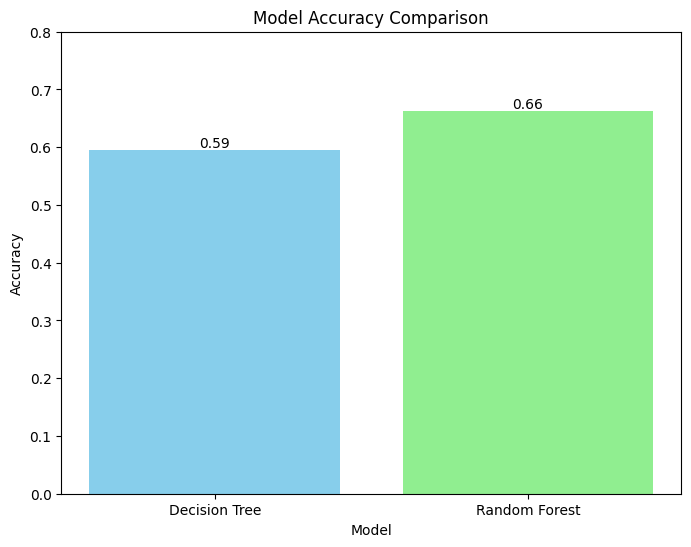

The Random Forest Classifier has a higher accuracy.


In [117]:
mod = ['Decision Tree', 'Random Forest']
acc = [acc_dt, acc_rf]

plt.figure(figsize=(8, 6))
bars = plt.bar(mod, acc, color=['skyblue', 'lightgreen'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom')
plt.ylim([0, 0.8])
plt.show()
if acc_dt > acc_rf:
    print("The Decision Tree Classifier has a higher accuracy.")
elif acc_rf > acc_dt:
    print("The Random Forest Classifier has a higher accuracy.")
else:
    print("Both classifiers have the same accuracy.")